In [23]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from collections import defaultdict
import json
from scipy.stats import norm
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../../data/2021/2021_mod.csv')

In [25]:
stop_cars = [16]
stop_times = ['1900-01-01 01:38:38.053000']
stop_zip = zip(stop_cars, stop_times)
sectors = defaultdict(lambda: defaultdict(list))
drivers = []

In [26]:
for car_num, time in stop_zip:
    temp = df[df['Car'] == car_num]
    time_dt = datetime.strptime(time, '%Y-%m-%d %H:%M:%S.%f')
    
    driver = ''
    for _, row in temp.iterrows():      
        if time_dt < datetime.strptime(row['Session Time'], '%Y-%m-%d %H:%M:%S.%f'):
            driver = row.Driver 
            break
        last_row = row
        
    if driver == '': driver = last_row.Driver    
    drivers.append(driver)
    
    temp = temp[temp['Driver'] == driver]
    
    per_yellow = True
    for _, row in temp.iterrows():  
        yellow = False
        
        if per_yellow and time_dt < datetime.strptime(row['Session Time'], '%Y-%m-%d %H:%M:%S.%f'):
            per_yellow = False
            yellow = True
        
        sectors[driver]['S1'].append((row.S01, yellow))
        sectors[driver]['S2'].append((row.S02, yellow))
        sectors[driver]['S3'].append((row.S03, yellow))
        

In [27]:
uDrivers = df['Driver'].unique()
caused_yellow = [ud in drivers for ud in uDrivers]
df2 = pd.DataFrame(columns=['Driver', 'Yellow'])
df2['Driver'] = uDrivers
df2['Yellow'] = np.array(caused_yellow).astype(int)

In [28]:
df2.to_csv('../../data/2021/21_driver_yellow.csv', index=False)

<ipython-input-29-dc557a81a45b>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s1_c = np.array(list(enumerate(sectors[driver]['S1'])))


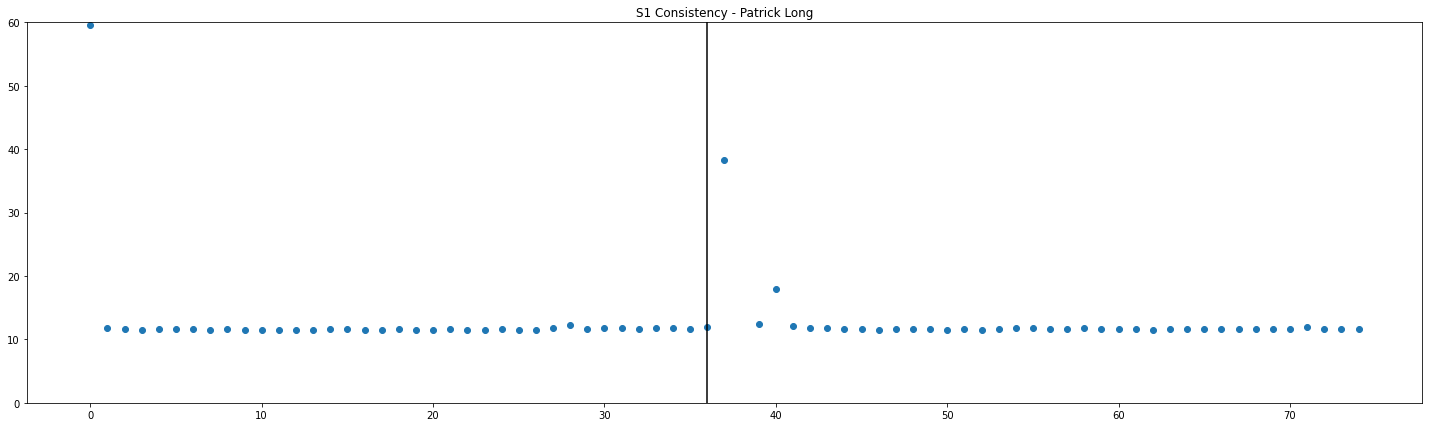

Sector 1 Variance:  10.020583648683678


<ipython-input-29-dc557a81a45b>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s2_c = np.array(list(enumerate(sectors[driver]['S2'])))


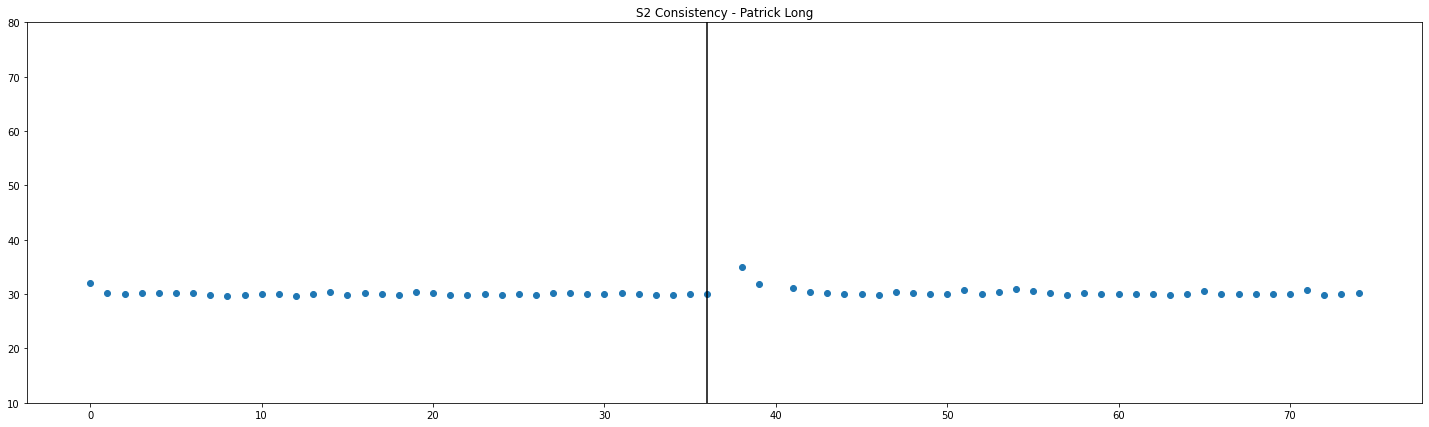

Sector 2 Variance:  13.653058637900724


<ipython-input-29-dc557a81a45b>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  s3_c = np.array(list(enumerate(sectors[driver]['S3'])))


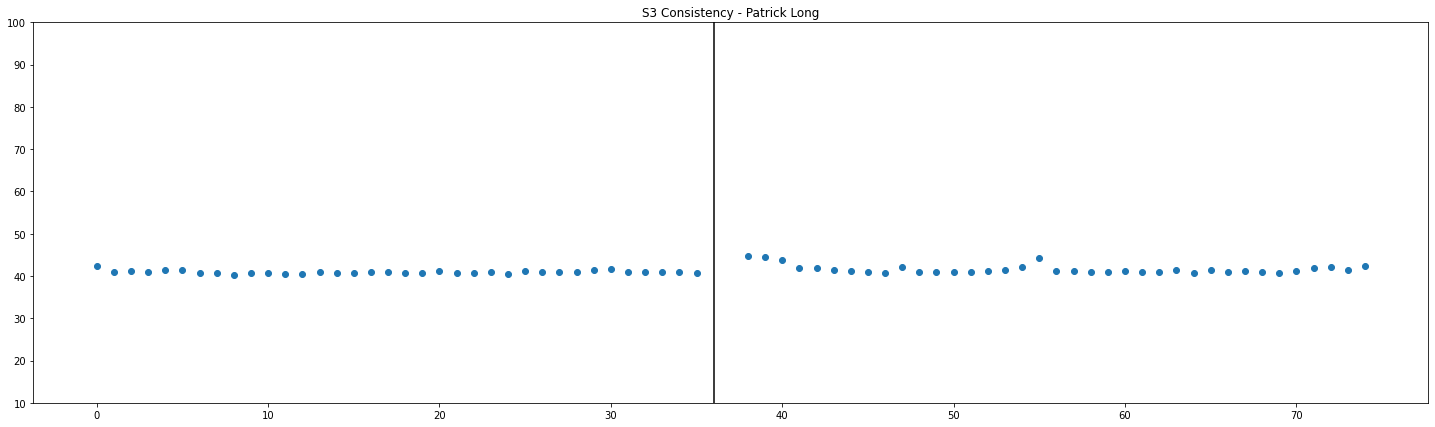

Sector 3 Variance:  30.759702030095582


In [29]:
for driver in sectors:
    
    s1_c = np.array(list(enumerate(sectors[driver]['S1'])))
    s1_x = s1_c[:, 0]
    s1_y = np.array([t[0] for t in s1_c[:, 1]])
    yellow_line = [t[0] for t in s1_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S1 Consistency - ' + driver)
    plt.ylim((0, 60))
    plt.scatter(s1_x, s1_y)
    plt.vlines(yellow_line, 0, 60)
    plt.show()
    
    s1_var = s1_y.std()
    print('Sector 1 Variance: ', s1_var)
    
    s2_c = np.array(list(enumerate(sectors[driver]['S2'])))
    s2_x = s2_c[:, 0]
    s2_y = np.array([t[0] for t in s2_c[:, 1]])
    yellow_line = [t[0] for t in s2_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S2 Consistency - ' + driver)
    plt.ylim((10, 80))
    plt.scatter(s2_x, s2_y)
    plt.vlines(yellow_line, 0, 120)
    plt.show()
    
    s2_var = s2_y.std()
    print('Sector 2 Variance: ', s2_var)
    
    s3_c = np.array(list(enumerate(sectors[driver]['S3'])))
    s3_x = s3_c[:, 0]
    s3_y = np.array([t[0] for t in s3_c[:, 1]])
    yellow_line = [t[0] for t in s3_c if t[1][1]]
    
    plt.figure(figsize=(25,7))
    plt.title('S3 Consistency - ' + driver)
    plt.ylim((10, 100))
    plt.scatter(s3_x, s3_y)
    plt.vlines(yellow_line, 0, 120)
    plt.show()
    
    s3_var = s3_y.std()
    print('Sector 3 Variance: ', s3_var)
    

In [30]:
drivers = df['Driver'].unique()

In [31]:
driver_sectors = defaultdict(lambda: defaultdict(list))

In [32]:
for driver in drivers:
    temp = df[df['Driver'] == driver]
    for _, row in temp.iterrows():
        driver_sectors[driver]['S1'].append(row.S01)
        driver_sectors[driver]['S2'].append(row.S02)
        driver_sectors[driver]['S3'].append(row.S03)

In [33]:
driver_std = defaultdict(lambda: defaultdict(int))
for d in driver_sectors:
    driver_std[d]['S1'] = np.array(driver_sectors[d]['S1']).std()
    driver_std[d]['S2'] = np.array(driver_sectors[d]['S2']).std()
    driver_std[d]['S3'] = np.array(driver_sectors[d]['S3']).std()

In [34]:
with open('../../data/2021/21_sector_std.csv', 'w') as f:
    f.write('Driver,Sector,Std\n')
    for driver in driver_std.keys():
        f.write("%s,%s,%s\n"%(driver, 1, driver_std[d]['S1']))
        f.write("%s,%s,%s\n"%(driver, 2, driver_std[d]['S2']))
        f.write("%s,%s,%s\n"%(driver, 3, driver_std[d]['S3']))